CMPU 250 | EDA  

# Data Cleaning

This data was collected by the government and therefore relatively clean and organized. To explore the question of what biases may affect the mortgage process, we selected key columns about the applicant's identity, their financial status, and a few general markers about the quality of the loan they did or did not receive. To this effect, we also removed all rows that did not have a value for derived_race.

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import sklearn as sk

In [81]:
import warnings
warnings.filterwarnings("ignore")

In [82]:
nys_data_raw = pd.read_csv("../data/raw-data/ny_home_purchase.csv")
nys_data_raw.head()

,activity_year,lei,derived_msa-md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,...,denial_reason-2,denial_reason-3,denial_reason-4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2023,549300JOT0D4J0SZIK67,10580,NY,36001.0,3.600101e+10,C,VA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,5959,15.66,113300,143.60,1516,2219,51
1,2023,549300JOT0D4J0SZIK67,15380,NY,36063.0,3.606302e+10,C,VA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,5709,17.46,93900,68.53,1871,2154,47
2,2023,549300JOT0D4J0SZIK67,35614,NY,36081.0,3.608103e+10,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,7365,98.52,99300,102.77,1466,2172,67
3,2023,549300JOT0D4J0SZIK67,40380,NY,36055.0,3.605501e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,5281,8.45,97300,121.93,1890,2336,52
4,2023,549300JOT0D4J0SZIK67,99999,NY,36039.0,3.603908e+10,C,FHA:First Lien,Single Family (1-4 Units):Manufactured,Ethnicity Not Available,...,NaN,NaN,NaN,4049,15.73,83700,125.59,1426,2286,53


**Variables to keep and clean:**
- action_taken
- derived_race
- derived_ethnicity
- applicant_sex
- applicant_age
- income
- debt_to_income_ratio
- applicant_credit_score_type
- loan_amount
- loan_to_value_ratio
- interest_rate
- rate_spread
- loan_type
- loan_purpose
- lien_status
- property_value
- occupancy_type
- tract_minority_population_percent
- aus-1
- denial_reason-1

In [84]:
nys_data = nys_data_raw[['action_taken', 'derived_race', 'derived_ethnicity', 'applicant_sex', 'applicant_age', 'income', 'debt_to_income_ratio', 'applicant_credit_score_type', 'loan_amount', 'loan_to_value_ratio', 'interest_rate', 'rate_spread', 'loan_type', 'loan_purpose', 'lien_status', 'property_value', 'occupancy_type', 'tract_minority_population_percent', 'aus-1', 'denial_reason-1']]

In [85]:
nys_data = nys_data[nys_data['derived_race'] != 'Race Not Available']
nys_data

,action_taken,derived_race,derived_ethnicity,applicant_sex,applicant_age,income,debt_to_income_ratio,applicant_credit_score_type,loan_amount,loan_to_value_ratio,interest_rate,rate_spread,loan_type,loan_purpose,lien_status,property_value,occupancy_type,tract_minority_population_percent,aus-1,denial_reason-1
199,3,White,Hispanic or Latino,1,55-64,NaN,NaN,9,485000.0,NaN,NaN,NaN,2,1,1,NaN,1,0.00,3,3
200,1,Black or African American,Not Hispanic or Latino,2,45-54,104.0,37,1,395000.0,96.5,7.125,1.054,2,1,1,405000,1,21.09,3,10
203,1,White,Not Hispanic or Latino,1,45-54,79.0,50%-60%,2,255000.0,96.5,6.25,0.458,2,1,1,265000,1,63.55,3,10
207,1,White,Not Hispanic or Latino,1,25-34,174.0,37,2,605000.0,80.0,6.125,-0.232,1,1,1,755000,1,25.74,1,10
208,3,White,Not Hispanic or Latino,1,35-44,NaN,NaN,9,215000.0,NaN,NaN,NaN,1,1,1,NaN,1,37.32,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198852,1,White,Joint,2,25-34,367.0,20%-<30%,3,625000.0,80.0,6.0,-0.566,1,1,1,785000,1,76.31,2,10
198854,1,White,Not Hispanic or Latino,2,55-64,86.0,41,3,205000.0,42.11,6.5,-0.159,1,1,1,475000,1,29.37,2,10
198855,1,Joint,Joint,1,45-54,230.0,20%-<30%,3,355000.0,41.52,6.375,0.221,1,1,1,855000,1,26.23,2,10
198856,1,White,Not Hispanic or Latino,2,<25,158.0,30%-<36%,2,315000.0,80.0,6.75,0.28,1,1,1,395000,1,72.08,1,10


In [86]:
# Convert column types to numerics and drop na
nys_data['property_value'] = pd.to_numeric(nys_data['property_value'], errors='coerce')
nys_data['debt_to_income_ratio'] = pd.to_numeric(nys_data['debt_to_income_ratio'], errors='coerce')
nys_data['interest_rate'] = pd.to_numeric(nys_data['interest_rate'], errors='coerce')
nys_data = nys_data.dropna(subset=['property_value'])

In [87]:
#Saving file
nys_data.to_csv("cleaned_nys_data.csv", index=False)

In [88]:
cleaned_nys_data = pd.read_csv('cleaned_nys_data.csv')
cleaned_nys_data.columns

Index(['action_taken', 'derived_race', 'derived_ethnicity', 'applicant_sex',
       'applicant_age', 'income', 'debt_to_income_ratio',
       'applicant_credit_score_type', 'loan_amount', 'loan_to_value_ratio',
       'interest_rate', 'rate_spread', 'loan_type', 'loan_purpose',
       'lien_status', 'property_value', 'occupancy_type',
       'tract_minority_population_percent', 'aus-1', 'denial_reason-1'],
      dtype='object')

In [89]:
print(cleaned_nys_data.dtypes)

action_taken                           int64
derived_race                          object
derived_ethnicity                     object
applicant_sex                          int64
applicant_age                         object
income                               float64
debt_to_income_ratio                 float64
applicant_credit_score_type            int64
loan_amount                          float64
loan_to_value_ratio                  float64
interest_rate                        float64
rate_spread                           object
loan_type                              int64
loan_purpose                           int64
lien_status                            int64
property_value                       float64
occupancy_type                         int64
tract_minority_population_percent    float64
aus-1                                  int64
denial_reason-1                        int64
dtype: object


In [90]:
# Creating a table of variables and their description

from tabulate import tabulate

data = [
    ["action_taken", "Final decision made on the loan application (e.g., approved, denied).",
     "(int) 1 (Loan originated), 2 (Application approved but not accepted), 3 (Application denied), 4 (Application withdrawn by applicant), 5 (File closed for incompleteness), 6 (Purchased loan)."],
    ["derived_race", "Race of the applicant as determined by the data system", "(object)"],
    ["derived_ethnicity", "Ethnicity of the applicant as derived from application data", "(object)"],
    ["applicant_sex", "Sex of the primary loan applicant", "(int)"],
    ["applicant_age", "Age of the primary loan applicant", "(object) '<25', '25-34', '35-44', '45-54', '55-64', and '>65'."],
    ["income", "Applicant’s annual income (in thousands of dollars)", "(Float)"],
    ["debt_to_income_ratio", "Ratio of applicant's monthly debt payments to income", "(Float) '<20%', '20%-<30%', '30%-<36%', '36%-<40%', '40%-<45%', '45%-<50%', '50%-60%', and '>60%'."],
    ["applicant_credit_score_type", "Type of credit score used for the applicant", "(int)"],
    ["loan_amount", "Total amount of the loan applied for", "(Float)"],
    ["loan_to_value_ratio", "Ratio of the loan amount to the appraised value of the property", "(Float)"],
    ["interest_rate", "Interest rate charged on the loan", "(Float)"],
    ["rate_spread", "Difference between the loan’s interest rate and the average prime offer rate", "(Object)"],
    ["loan_type", "Type of loan (e.g., conventional, FHA, VA, etc.)", "(int) 1 (Conventional), 2 (FHA), 3 (VA), 4 (RHS or FSA)."],
    ["loan_purpose", "Purpose of the loan (e.g., home purchase, refinancing, etc.)", "(int) 1 (Home purchase), 2 (Home improvement), 31 (Refinancing), 32 (Cash-out refinancing), 4 (Other purpose), 5 (Not applicable)."],
    ["lien_status", "Indicates whether the loan is a first or subordinate lien", "(int) 1 (First lien), 2 (Subordinate lien)."],
    ["property_value", "Appraised value of the property backing the loan", "(Float)"],
    ["occupancy_type", "Indicates whether the property is owner-occupied, rental, etc.", "(int) 1 (Principal residence), 2 (Second residence), 3 (Investment property)."],
    ["tract_minority_population_percent", "Percentage of minority population in the census tract", "(Float)"],
    ["aus-1", "Automated Underwriting System used for the loan decision", "(int) 1 (Desktop Underwriter), 2 (Loan Prospector), 3 (Technology Open to Approved Lenders), 4 (Guaranteed Underwriting System), 5 (Other), 6 (Not applicable)."],
    ["denial_reason-1", "Primary reason for denial if the loan was denied", "(int) 1 (Debt-to-income ratio), 2 (Employment history), 3 (Credit history), 4 (Collateral), 5 (Insufficient cash), 6 (Unverifiable information), 7 (Credit application incomplete), 8 (Mortgage insurance denied), 9 (Other), 10 (Not applicable)."]
]

headers = ["Variable Name", "Description", "Type/Values"]
print(tabulate(data, headers=headers, tablefmt="grid"))


+-----------------------------------+------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Variable Name                     | Description                                                                  | Type/Values                                                                                                                                                                                                                                        |
+===================================+==============================================================================+================================================================================================================================================================

In [91]:
# rename dataframe
df = cleaned_nys_data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115275 entries, 0 to 115274
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   action_taken                       115275 non-null  int64  
 1   derived_race                       115275 non-null  object 
 2   derived_ethnicity                  115275 non-null  object 
 3   applicant_sex                      115275 non-null  int64  
 4   applicant_age                      115275 non-null  object 
 5   income                             110793 non-null  float64
 6   debt_to_income_ratio               56438 non-null   float64
 7   applicant_credit_score_type        115275 non-null  int64  
 8   loan_amount                        115275 non-null  float64
 9   loan_to_value_ratio                107794 non-null  float64
 10  interest_rate                      101552 non-null  float64
 11  rate_spread                        8938

In [92]:
df.describe()

,action_taken,applicant_sex,income,debt_to_income_ratio,applicant_credit_score_type,loan_amount,loan_to_value_ratio,interest_rate,loan_type,loan_purpose,lien_status,property_value,occupancy_type,tract_minority_population_percent,aus-1,denial_reason-1
count,115275.000000,115275.000000,110793.000000,56438.000000,115275.000000,1.152750e+05,1.077940e+05,101552.000000,115275.000000,115275.0,115275.000000,1.152750e+05,115275.000000,115275.000000,115275.000000,115275.000000
mean,1.522082,1.404025,187.928705,42.847975,3.255216,4.151954e+05,2.189659e+02,6.548537,1.188115,1.0,1.024420,5.758489e+05,1.158942,34.168363,3.089031,9.421991
std,1.260157,0.507102,646.440041,4.026380,2.739852,4.232226e+05,4.568690e+04,1.078750,0.480385,0.0,0.154349,1.479985e+06,0.513637,26.748931,14.387871,14.322402
min,1.000000,1.000000,-5197.000000,36.000000,1.000000,5.000000e+03,8.000000e-01,0.000000,1.000000,1.0,1.000000,5.000000e+03,1.000000,0.000000,1.000000,1.000000
25%,1.000000,1.000000,79.000000,39.000000,1.000000,1.750000e+05,7.400000e+01,6.000000,1.000000,1.0,1.000000,2.250000e+05,1.000000,13.190000,1.000000,10.000000
50%,1.000000,1.000000,123.000000,43.000000,2.000000,3.050000e+05,8.000000e+01,6.500000,1.000000,1.0,1.000000,4.250000e+05,1.000000,25.130000,2.000000,10.000000
75%,1.000000,2.000000,191.000000,46.000000,3.000000,5.350000e+05,9.500000e+01,7.000000,1.000000,1.0,1.000000,7.050000e+05,1.000000,46.230000,6.000000,10.000000
max,8.000000,6.000000,151791.000000,49.000000,11.000000,1.820500e+07,1.500000e+07,14.590000,4.000000,1.0,2.000000,4.500050e+08,3.000000,100.000000,1111.000000,1111.000000


In [93]:
df.nunique()

action_taken                             6
derived_race                             8
derived_ethnicity                        5
applicant_sex                            4
applicant_age                            8
income                                2012
debt_to_income_ratio                    14
applicant_credit_score_type             10
loan_amount                            463
loan_to_value_ratio                  16993
interest_rate                         1275
rate_spread                          15348
loan_type                                4
loan_purpose                             1
lien_status                              2
property_value                         614
occupancy_type                           3
tract_minority_population_percent     3643
aus-1                                    8
denial_reason-1                         11
dtype: int64

# Exploring Applicant Demographics (Key Explanatory Variables)

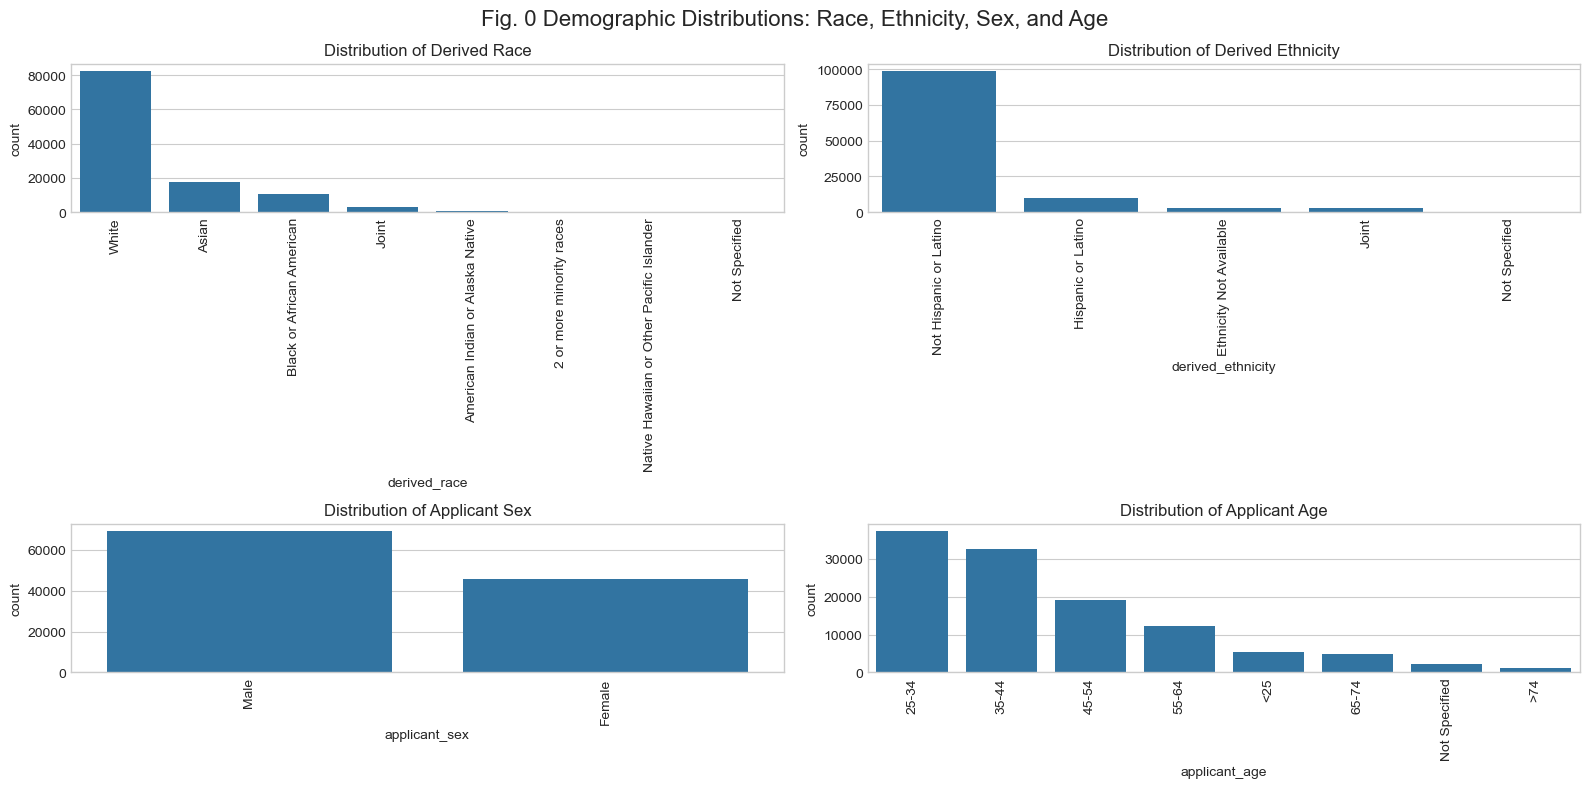

In [95]:
# Demographics plots: presenting the distribution of derived race, ethnicity, sex and age

# Variables to plot
categorical_vars = ['derived_race', 'derived_ethnicity', 'applicant_sex', 'applicant_age']

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))
axes = axes.flatten()

for i, var in enumerate(categorical_vars):
    data_to_plot = cleaned_nys_data.copy()

    if var == 'applicant_sex':
        # Keep only 1 (Male) and 2 (Female)
        data_to_plot = data_to_plot[data_to_plot['applicant_sex'].isin([1, 2])].copy()
        data_to_plot['applicant_sex'] = data_to_plot['applicant_sex'].map({1: 'Male', 2: 'Female'})
        order = ['Male', 'Female']
    elif var == 'applicant_age':
        # Replace 8888 with 'not specified'
        data_to_plot[var] = data_to_plot[var].replace('8888', 'Not Specified')
        order = data_to_plot[var].value_counts().index
    elif var == 'derived_ethnicity':
      # Replace "Free form text only" with "not specified"
        data_to_plot[var] = data_to_plot[var].replace('Free Form Text Only', 'Not Specified')
        order = data_to_plot[var].value_counts().index
    elif var == 'derived_race':
      # Replace "Free form text only" with "not specified"
        data_to_plot[var] = data_to_plot[var].replace('Free Form Text Only', 'Not Specified')
        order = data_to_plot[var].value_counts().index
    else:
        order = data_to_plot[var].value_counts().index

    sns.countplot(data=data_to_plot, x=var, ax=axes[i], order=order)
    axes[i].set_title(f"Distribution of {var.replace('_', ' ').title()}")
    axes[i].tick_params(axis='x', rotation=90)
    
# Removing unused plots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Fig. 0 Demographic Distributions: Race, Ethnicity, Sex, and Age", fontsize=16)
plt.tight_layout()
plt.show()

Figure 0 presents the distribution of four demographic variables: race, ethnicity, sex, and age. The data reveal that the majority of applicants identify as White, followed by Asian and Black or African American individuals. For ethnicity, the overwhelming majority of applicants are Not Hispanic or Latino, indicating limited representation from Hispanic or Latino communities in the dataset.

When examining sex, male applicants outnumber female applicants, though the difference is not extreme. Lastly, the most common age group among applicants is 35–44 years old, followed closely by the 45–54 and 25–34 brackets. The least represented age groups include those under 25 and over 74.

These distributions suggest that while the dataset is predominantly composed of White, non-Hispanic, and male applicants, there is still sufficient diversity across other demographic groups to support meaningful subgroup analyses.

# Exploring Loan Outcomes (Outcome Variables)

In this section we explore our outcome variables to get a sense of how many applications were denied (and why), and what terms upon which people did successfully obtain loans. Overall, the state has high acceptance rates reaching into the millions on a lot of outlier data points. Those who aren't approved are most often rejected on the basis of their debt-to-income ratio, suggesting that credit is a driving force in the process. The large range of loan amounts suggest that examining subsets may be most useful to find bias.

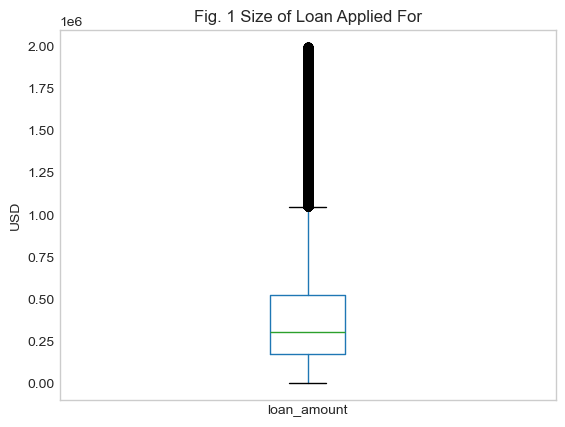

In [99]:
# boxplot for loan amount
df_filtered = df[df['loan_amount'] < 2000000]
df_filtered.boxplot('loan_amount', grid=False)


plt.title('Fig. 1 Size of Loan Applied For')
plt.ylabel('USD')
plt.show()

In Figure 1, we can see that the distribution of loan values has some high outliers.
We set a threshold of $2,000,000 because there were a couple of extreme outliers
preventing us from seeing the spread of the data. This indicates that a few applicants
requested very large sums of money.

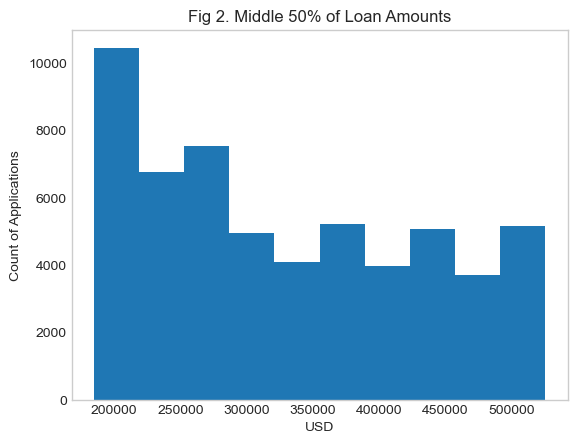

In [101]:
#df_filtered = df[df['loan_amount'] < 750000]

# calculate IQ range
q1, q3 = np.percentile(df['loan_amount'], [25, 75])

df_filtered = df[(df['loan_amount'] > q1) & (df['loan_amount'] < q3) ]

# plot a histogram showing the breakdown of loan values in the middle range
df_filtered.hist('loan_amount', grid=False)
plt.title('Fig 2. Middle 50% of Loan Amounts')
plt.ylabel('Count of Applications')
plt.xlabel('USD')
plt.show()

The interquartile range of the loan amounts can tell us more about the average loan application. The 25 quartile is 175000 and the 75th quartile is 525000. Fig. 2 displays the data that lie between these values. We can see that this middle data has a right skew, so most applications were on the lower end clustered around in the low hundred thousands.

In [103]:
# Status labels for legend
status_labels = {
    1: 'Loan Originated',
    2: 'Application Approved but Not Accepted',
    3: 'Application Denied',
    4: 'Application Withdrawn by Applicant',
    5: 'File Closed for Incompleteness',
    6: 'Purchased Loan',
    7: 'Preapproval Request Denied',
    8: 'Preapproval Request Approved but Not Accepted'
}

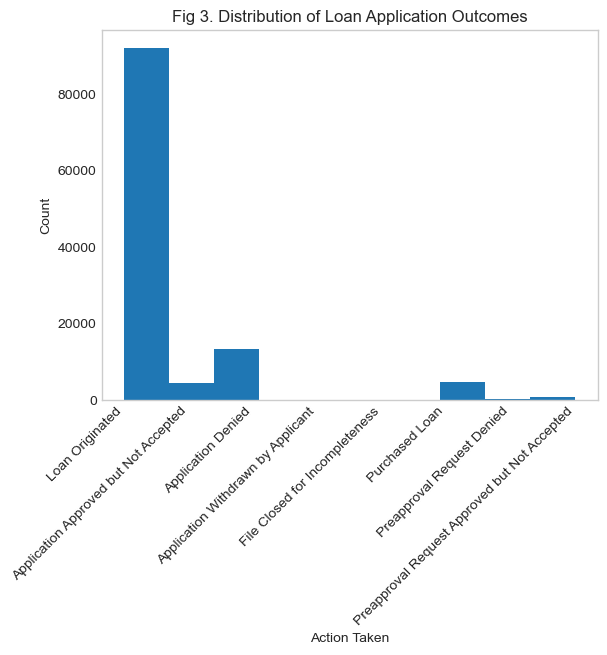

In [104]:
plt.hist(x=df['action_taken'])

plt.xticks(ticks=list(status_labels.keys()), labels=list(status_labels.values()), rotation=45, ha="right")

plt.grid(False)
plt.xlabel("Action Taken")
plt.ylabel("Count")
plt.title("Fig 3. Distribution of Loan Application Outcomes")

plt.show()

Figure 3 displays the distribution of loan application outcomes. The most common outcome by a wide margin is Loan Originated, indicating that a significant portion of applications were successful. This is followed by Application Denied, which is the second most frequent result, highlighting a notable rate of rejection.

Other outcomes, such as Application Withdrawn by Applicant, File Closed for Incompleteness, and Purchased Loan, occur much less frequently. The least common categories—Preapproval Request Denied and Preapproval Request Approved but Not Accepted—represent only a small fraction of total applications.

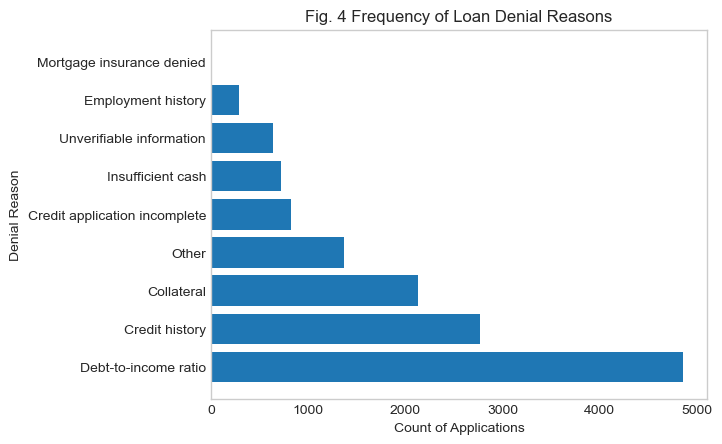

In [106]:
# count occurrences of each denial reason
counts = df['denial_reason-1'].value_counts()

# remove 'Not applicable' and 'Exempt' entries
counts = counts.drop(labels=[10,1111])
denial_reasons = ['Debt-to-income ratio','Credit history','Collateral','Other','Credit application incomplete','Insufficient cash','Unverifiable information','Employment history','Mortgage insurance denied']

# plot reasons
plt.barh(denial_reasons, counts)
plt.ylabel('Denial Reason')
plt.xlabel('Count of Applications')
plt.grid(False)
plt.title('Fig. 4 Frequency of Loan Denial Reasons')
plt.show()

This bar plot shows the most common reasons for a loan application to be denied. We can see that the applicant's monthly debt-to-income ratio (usually a value between 20% and 60%) is the most likely cause of rejection, accounting for as many cases as the next two causes combined. Therefore, low-income neighborhoods which are targeted by predatory lending companies may face the most difficulty in achieving home ownership due to the amount of debt they've accrued.

# Exploring Correlations

In this section we investigate to what extent the loan outcomes are driven by our explanatory variables. In general, it appears that there is no one factor, such as being Hispanic, that significantly impacts how an applicant will fare in the decision-making process. This leads us to conclude that it is a combination of factors that have the most impact. In our preliminary analysis, we'll continue to explore more statistically significant correlations.

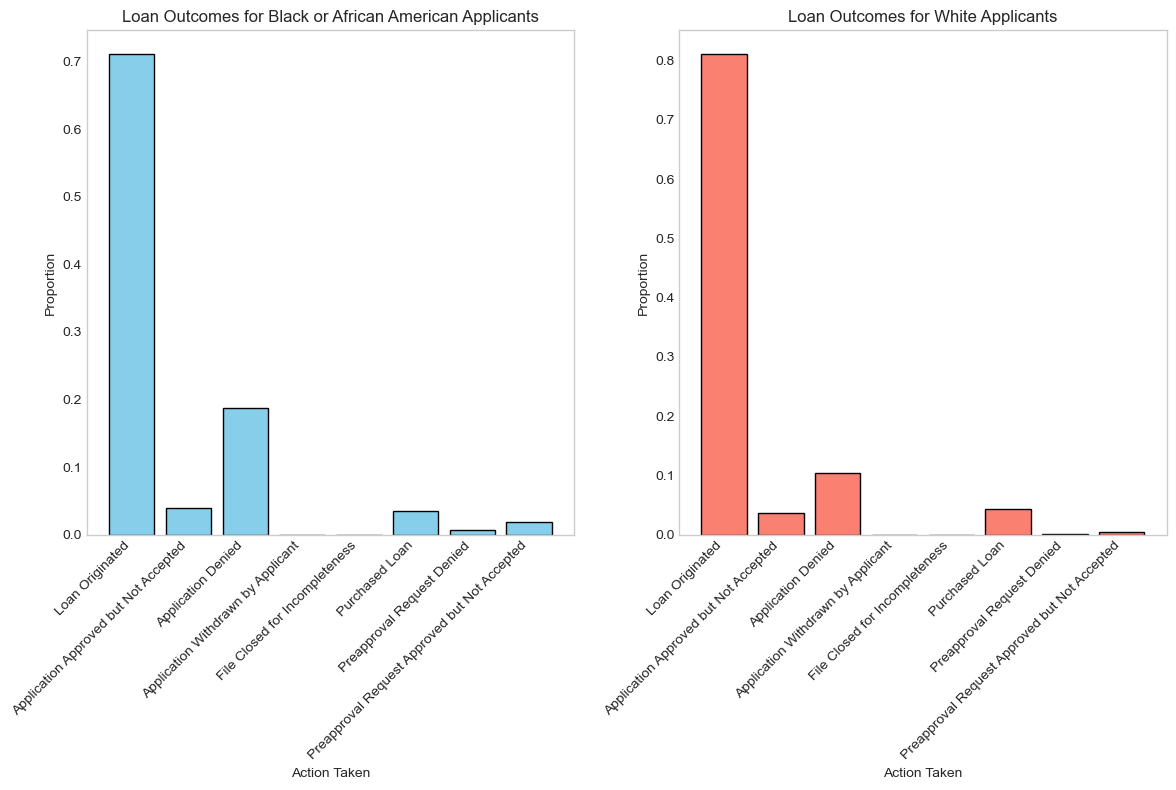

In [110]:
races_of_interest = ['Black or African American', 'White' ]
colors = ['skyblue','salmon']

# Create subplots: one for each race
fig, axes = plt.subplots(nrows=1, ncols=len(races_of_interest), figsize=(12,8))

for ax, race, color in zip(axes, races_of_interest, colors):
    # Uses the race column name to select data
    race_data = df[df['derived_race'] == race]['action_taken']
    race_data = race_data[race_data.isin(status_labels.keys())]

    # Calculate proportions
    value_counts = race_data.value_counts(normalize=True).sort_index()
    proportions = value_counts.reindex(status_labels.keys(), fill_value=0)

    # Plot the histogram for the current race
    ax.bar(proportions.index, proportions.values, color=color, edgecolor='black', width=0.8)

    # Set the x-ticks, labels, title as above
    ax.set_xticks(list(status_labels.keys()))
    ax.set_xticklabels(list(status_labels.values()), rotation=45, ha="right")
    ax.set_xlabel("Action Taken")
    ax.set_ylabel("Proportion")
    ax.set_title(f"Loan Outcomes for {race} Applicants")
    ax.grid(False)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

These figures show the outcomes for Black and white applicants, respectively. We can see that the
proportion of denials for Black applicants is approximately twice as high, and there is also
evidence that slightly more preapproval requests were denied, or approved but then not accepted.
The 'Loan Originated' metric indicates whether the applicants actually received the loan, and
this value is about 15% lower for Black applicants as well.

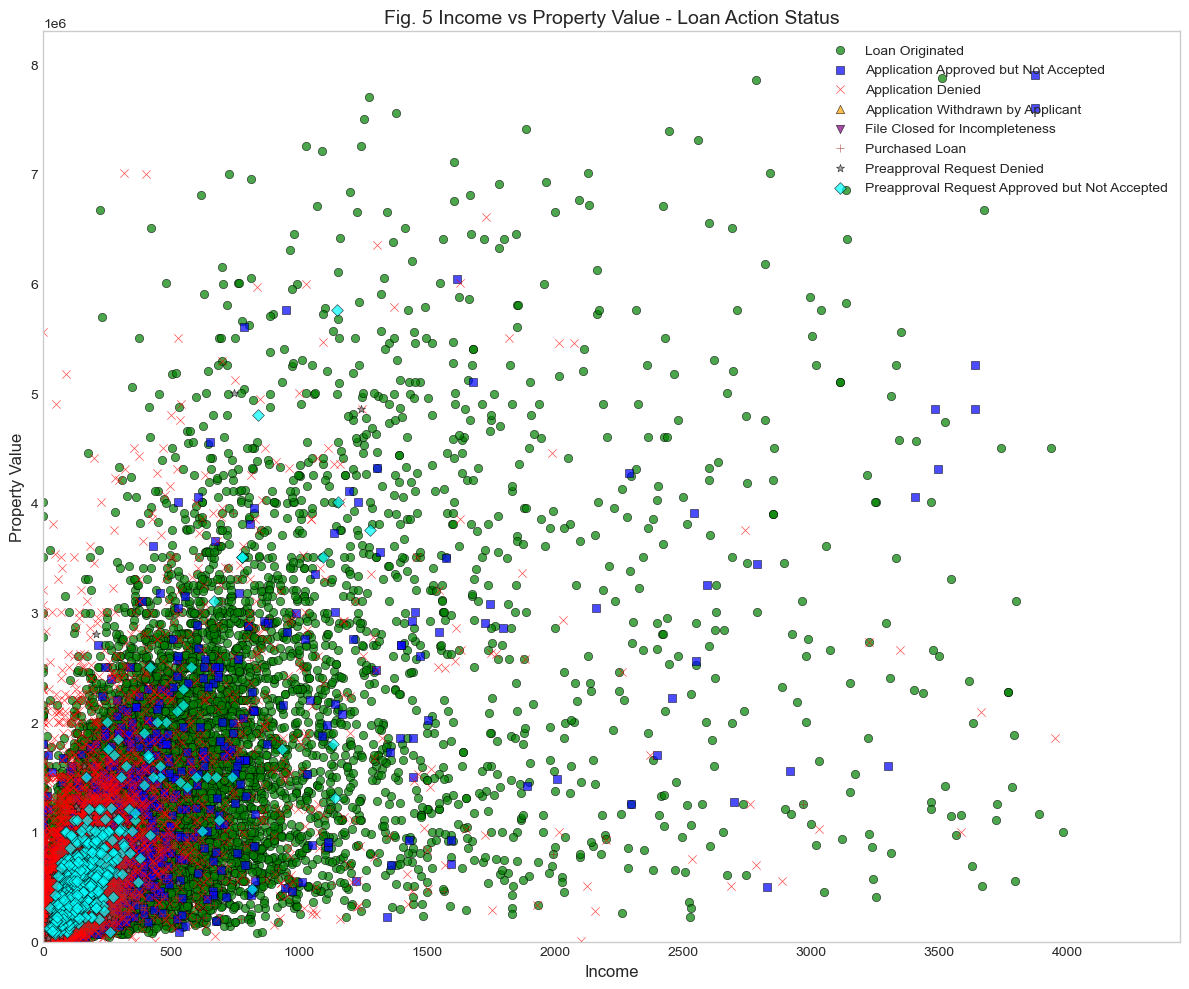

In [112]:
plt.style.use('seaborn-v0_8-whitegrid')

df = df.dropna(subset=['property_value'])
df = df[df['property_value'] < 8000000]
df = df[df['income'] < 4000]

plt.figure(figsize=(12, 10))

markers = {
    1: 'o',
    2: 's',
    3: 'x',
    4: '^',
    5: 'v',
    6: '+',
    7: '*',
    8: 'D'
}

colors = {
    1: 'green',
    2: 'blue',
    3: 'red',
    4: 'orange',
    5: 'purple',
    6: 'brown',
    7: 'gray',
    8: 'cyan'
}

# Status labels for legend
status_labels = {
    1: 'Loan Originated',
    2: 'Application Approved but Not Accepted',
    3: 'Application Denied',
    4: 'Application Withdrawn by Applicant',
    5: 'File Closed for Incompleteness',
    6: 'Purchased Loan',
    7: 'Preapproval Request Denied',
    8: 'Preapproval Request Approved but Not Accepted'
}

# Create the scatter plot with custom markers for each status
for status in range(1, 9):
    mask = df['action_taken'] == status
    plt.scatter(
        x=df.loc[mask, 'income'],
        y=df.loc[mask, 'property_value'],
        marker=markers[status],
        c=colors[status],
        alpha=0.7,
        edgecolors='black',
        linewidth=0.5,
        label=status_labels[status],
    )
    
plt.grid(False)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Property Value', fontsize=12)
plt.title('Fig. 5 Income vs Property Value - Loan Action Status', fontsize=14)

# Set axes to start at 0
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.legend()
plt.tight_layout()
plt.show()

This figure shows the income of applicants plotted against property value, with different markers indicating the different loan outcomes. From this figure, we can get an idea of which applicants are applying for what types of loans as well as visualizing trends of what is happening with these loans. As expected members higher income tend to apply for higher property values, but we can also see many members with higher income apply for homes with lower property values indicating that more factors are needed to predict behavior and outcomes. This graph also shows how income is strongly right skewed, and also the variability of loans and outcomes with that are captured in the dataset.

In [114]:
# transform derived race to binary column for white or Black

df_slice = df.loc[(df['derived_race'] == "Black or African American") | (df['derived_race'] == "White")]
df_race = df_slice.copy()
df_race['binary_race'] = 0
df_race.loc[df_race['derived_race'] == "White", 'binary_race'] = 1

# # transform derived ethnicity to binary column for Hispanic or not
df_race['binary_ethnicity'] = 0
df_race.loc[df_race['derived_ethnicity'] == "Not Hispanic or Latino", 'binary_ethnicity'] = 1

# # create column with 0 for denied applications/preapproval requests and 1 for accepted applications
df_race['binary_denied'] = 0
df_race.loc[(df_race['action_taken'] == 3) | (df_race['action_taken'] == 7), 'binary_denied'] = 1

# # create correlation matrix
df_corr = df_race[['applicant_sex','binary_race','binary_ethnicity','binary_denied']]
df_corr.corr()

,applicant_sex,binary_race,binary_ethnicity,binary_denied
applicant_sex,1.000000,-0.091802,0.000838,0.020215
binary_race,-0.091802,1.000000,-0.024844,-0.086665
binary_ethnicity,0.000838,-0.024844,1.000000,-0.049795
binary_denied,0.020215,-0.086665,-0.049795,1.000000


To investigate our hypothesis about loan outcomes being racially biased, we classified each application as being submitted by a white person or a Black person, and by someone Hispanic or not Hispanic. Then we looked for a correlation between the identity information and the outcome. In the 'action_taken' field, a value of 3 indicates the application was denied and 7 indicates that a preapproval requested was denied.

This matrix shows no evidence of strong correlation. It's possible that signs of bias would only show up with a more intersectional analysis.

In [116]:
import statsmodels.api as sm

df_race = df_race.dropna(subset=['interest_rate', 'tract_minority_population_percent', 'applicant_age',
                                 'debt_to_income_ratio', 'income', "property_value", "loan_to_value_ratio", "loan_amount"])

X = df_race[['tract_minority_population_percent', "binary_race", "debt_to_income_ratio", 'income', "property_value"]]
y = df_race['loan_amount']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_amount   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                 5.221e+04
Date:                Fri, 28 Mar 2025   Prob (F-statistic):               0.00
Time:                        16:44:30   Log-Likelihood:            -5.4223e+05
No. Observations:               41170   AIC:                         1.084e+06
Df Residuals:                   41164   BIC:                         1.085e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Our MLR explains around 71% of the variance in loan amount because the R-squareed value is 0.71. All the predictive variables were also statistically significant (tract_minority_population_percent, binary_race, debt_to_income_variable, income, property value, and loans_to_value_ratio) because they all had P-values below 0.05. The positive coefficients for all of the variables indicate that when controlling for income, property value and other financial factors, race is still a significant predictor - with white applicants predicted to receive $2500 more for their total loan amount. This model suggests that race is significant and is promising for future analsyis.